In [1]:
#!/usr/bin/env python3

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



In [10]:
def read_vtk(particles_file, rdf_file, par_file, MC_file, en_file):
  global data
  global RDF
  global par
  global mc
  global en
  data = np.loadtxt(particles_file, delimiter=" ", usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), skiprows=0)
  #RDF = np.loadtxt(rdf_file, delimiter=" ", usecols=(0, 1), skiprows=0)
  par = np.loadtxt(par_file, delimiter=" ", usecols=(0, 1, 2, 3), skiprows=0)
  mc = np.loadtxt(mc_file, delimiter=" ", usecols=(0, 1, 2), skiprows=0)
  en = np.loadtxt(en_file, delimiter=" ", usecols=(0, 1, 2), skiprows=0)
# x y z (three columns) and a row for each particle

particles_file = "particles.txt"
rdf_file = "RDF.txt"
par_file = "vol_parameters.txt"
mc_file = "MonteCarloLog.txt"
en_file = "energy.txt"






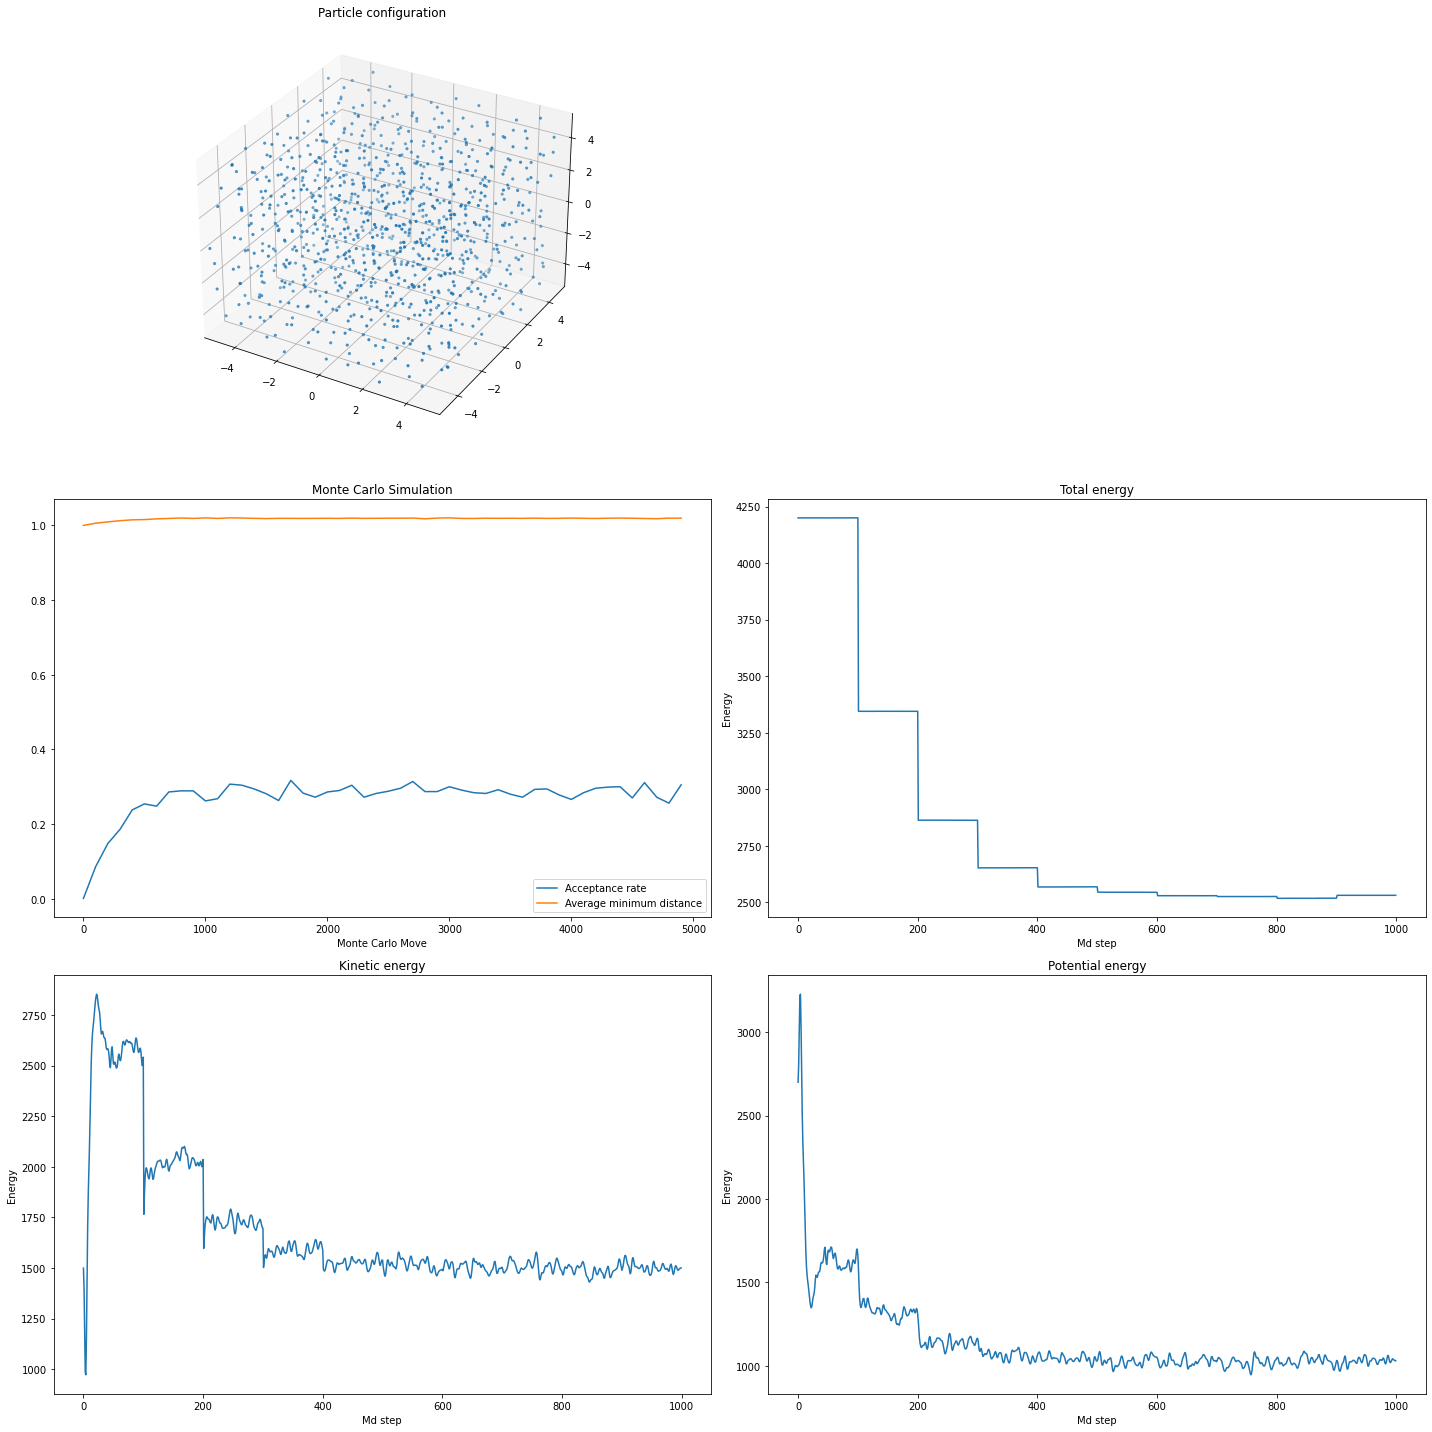

In [11]:
read_vtk(particles_file, rdf_file, par_file, mc_file, en_file)

L= float(par[2])


fig = plt.figure(figsize =(20,20))
ax1 = fig.add_subplot(321, projection='3d')
ax1.set_title("Particle configuration")
# s = size of the spheres. For the sake of visualization it might be useful to reduce it sometimes
ax1.set_xlim(-L/2,L/2)
ax1.set_ylim(-L/2,L/2)
ax1.set_zlim(-L/2,L/2)
ax1.scatter(data[:,2],data[:,3],data[:,4],s=0.1*(fig.dpi/L)**2) 

"""
ax2 = fig.add_subplot(322)
ax2.set_title("Radial distribution function")
ax2.set_xlabel("r")
ax2.set_ylabel("RDF")
ax2.plot(RDF[:,0], RDF[:,1])
"""

ax3 = fig.add_subplot(323)
ax3.set_title("Monte Carlo Simulation")
ax3.set_xlabel("Monte Carlo Move")
ax3.plot(mc[:,0], mc[:,1], label = "Acceptance rate")
ax3.plot(mc[:,0], mc[:,2], label = "Average minimum distance")
ax3.legend()

ax4 = fig.add_subplot(324)
ax4.set_title("Total energy")
ax4.set_xlabel("Md step")
ax4.set_ylabel("Energy")
ax4.plot(en[:,2])

ax5 = fig.add_subplot(325)
ax5.set_title("Kinetic energy")
ax5.set_xlabel("Md step")
ax5.set_ylabel("Energy")
ax5.plot(en[:,0])

ax6 = fig.add_subplot(326)
ax6.set_title("Potential energy")
ax6.set_xlabel("Md step")
ax6.set_ylabel("Energy")
ax6.plot(en[:,1])


fig.tight_layout()
plt.show()



